<a href="https://colab.research.google.com/github/cartman12/DS-Unit-2-Regression-1/blob/master/module2-evaluating-forecasts/Mohamad%20Ali%20Nasser%20-%20evaluating_forecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
#

!pip install pandas==0.24.2
!pip install matplotlib==3.0.1

In [0]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


from sklearn.metrics import mean_absolute_error

In [4]:
matplotlib.__version__

'3.0.1'

In [0]:
project = 'en.wikipedia'
access ='all-access'
agent = 'user'
article = 'Cider_vinegar'
granularity = 'daily'
start = '20150701'
end = '20190527'

endpoint = f'/metrics/pageviews/per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'
url = 'https://wikimedia.org/api/rest_v1' + endpoint
response = requests.get(url)

assert response.status_code == 200
df = pd.DataFrame(response.json()['items'])
df = df.rename(columns = {'timestamp' : 'ds', 'views' : 'y'})
df['ds'] = pd.to_datetime(df['ds'], format = '%Y%m%d%H')


In [0]:
df = df[['ds','y']]

In [60]:
df.head()

,ds,y
0,2015-07-01,7
1,2015-07-02,8
2,2015-07-03,5
3,2015-07-04,3
4,2015-07-05,2


In [0]:
df = df.set_index('ds')

In [0]:
train = df['2015':'2018-08']
test = df['2018-09':'2019']

In [0]:
train = train.reset_index()
test =  test.reset_index()

In [64]:
train.tail()

,ds,y
1148,2018-08-27,1
1149,2018-08-28,4
1150,2018-08-29,6
1151,2018-08-30,3
1152,2018-08-31,7


In [65]:
test.head()

,ds,y
0,2018-09-01,0
1,2018-09-02,2
2,2018-09-03,2
3,2018-09-04,4
4,2018-09-05,3


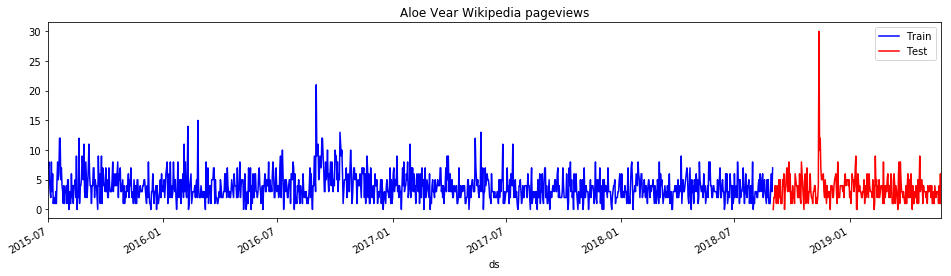

In [66]:
ax = train.plot(x='ds', y='y', color='blue', label='Train', figsize=(16,4))
test.plot(x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Aloe Vear Wikipedia pageviews');

In [0]:
train['mean_baseline'] = train['y'].mean()
test['mean_baseline']  = train['y'].mean()

In [68]:
train_mae_mean = mean_absolute_error(train['y'], train['mean_baseline'])
test_mae_mean = mean_absolute_error(test['y'], test['mean_baseline'])

train_mae_mean,test_mae_mean

(1.7851947745201062, 1.7291806750668341)

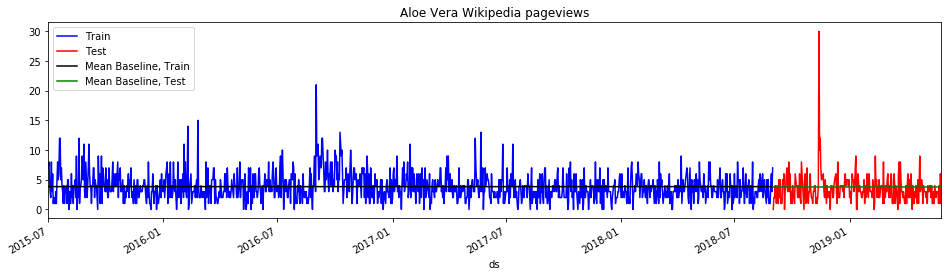

In [69]:
ax = train.plot(x='ds', y='y', color='blue', label='Train', figsize=(16,4))
test.plot(x='ds', y='y', color='red', label='Test', ax=ax)

train.plot(x='ds', y='mean_baseline', color='black', 
           label='Mean Baseline, Train', ax=ax)
test.plot(x='ds', y='mean_baseline', color='green', 
          label='Mean Baseline, Test', ax=ax)
plt.title('Aloe Vera Wikipedia pageviews');

In [0]:
train['naive_baseline'] = train['y'].shift(1).bfill()
train_last_observation = train['naive_baseline'].iloc[-1]
test['naive_baseline'] = train_last_observation

In [71]:
train_mae_naive = mean_absolute_error(train['y'], train['naive_baseline'])
test_mae_naive = mean_absolute_error(test['y'], test['naive_baseline'])
train_mae_naive, test_mae_naive

(2.3538594969644406, 1.6441947565543071)

In [0]:
def leastMEA(train, test):
  # Mean
  train['mean_baseline'] = train['y'].mean()
  test['mean_baseline']  = train['y'].mean()
  
  train_mae_mean = mean_absolute_error(train['y'], train['mean_baseline'])
  test_mae_mean = mean_absolute_error(test['y'], test['mean_baseline'])
  # Last observation
  train['naive_baseline'] = train['y'].shift(1).bfill()
  train_last_observation = train['naive_baseline'].iloc[-1]
  test['naive_baseline'] = train_last_observation
  
  train_mae_naive = mean_absolute_error(train['y'], train['naive_baseline'])
  test_mae_naive = mean_absolute_error(test['y'], test['naive_baseline'])
  
  
  # Prophet
  m = Prophet(daily_seasonality=False)
  m.fit(train)
  train_forecast = m.predict(train)
  test_forecast = m.predict(test)
  
  train_forecast = train_forecast[['ds','yhat']]
  test_forecast = test_forecast[['ds','yhat']]
  
  train_mae = mean_absolute_error(train['y'], train_forecast['yhat'])
  test_mae = mean_absolute_error(test['y'], test_forecast['yhat'])
  
  test_forecast['ds'] = pd.to_datetime(test_forecast['ds'], format = '%Y%m%d%H')
  test_forecast['ds'] = pd.to_datetime(test_forecast['ds'], format = '%Y%m%d%H')

  list_baseline = [test_mae_mean,test_mae_naive,test_mae]
  if min(list_baseline) == test_mae_mean:
      print('Lowest test MAE mean: Mean baseline:', test_mae_mean) 
  elif min(list_baseline) == test_mae_naive:
    print('Lowest test MAE mean: Naive baseline:', test_mae_naive)
  else:
    print('Lowest test MAE mean: Naive baseline:', test_mae)
    
  
  ax = train.plot(x='ds', y='y', color='blue', label='Train', figsize=(16,4))
  test.plot(x='ds', y='y', color='red', label='Test', ax=ax)
  train_forecast.plot(x='ds', y='yhat', color='black', 
                    label='Prophet forecast, train', ax=ax)
  test_forecast.plot(x='ds', y='yhat', color='green', 
                   label='Prophet forecast, test', ax=ax)
  plt.title('Aloe Vera Wikipedia pageviews');
  
 
  
  

Lowest test MAE mean: Naive baseline: 1.6441947565543071


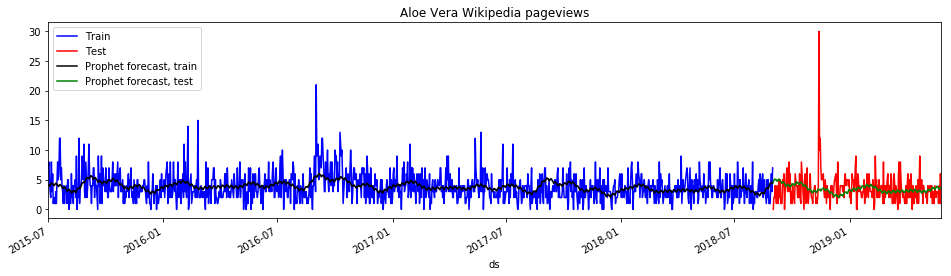

In [73]:
leastMEA(train, test)

In [78]:
m = Prophet()
m.fit(train)
train_forecast = m.predict(train)
test_forecast = m.predict(test)


train_mae = mean_absolute_error(train['y'], train_forecast['yhat'])
test_mae = mean_absolute_error(test['y'], test_forecast['yhat'])


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
train_mae, test_mae

(1.7210953497367287, 1.7676895893784428)

In [80]:
train_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1148,2018-08-27,3.432899,1.537908,7.335281,3.432899,3.432899,0.994155,0.994155,0.994155,0.223835,0.223835,0.223835,0.770320,0.770320,0.770320,0.0,0.0,0.0,4.427054
1149,2018-08-28,3.432676,1.559063,7.406258,3.432676,3.432676,1.050537,1.050537,1.050537,0.150052,0.150052,0.150052,0.900485,0.900485,0.900485,0.0,0.0,0.0,4.483213
1150,2018-08-29,3.432454,1.611860,7.318284,3.432454,3.432454,1.020382,1.020382,1.020382,-0.002713,-0.002713,-0.002713,1.023095,1.023095,1.023095,0.0,0.0,0.0,4.452835
1151,2018-08-30,3.432231,1.800282,7.541240,3.432231,3.432231,1.159215,1.159215,1.159215,0.022819,0.022819,0.022819,1.136396,1.136396,1.136396,0.0,0.0,0.0,4.591446
1152,2018-08-31,3.432009,1.686407,7.587063,3.432009,3.432009,0.969508,0.969508,0.969508,-0.269289,-0.269289,-0.269289,1.238798,1.238798,1.238798,0.0,0.0,0.0,4.401517


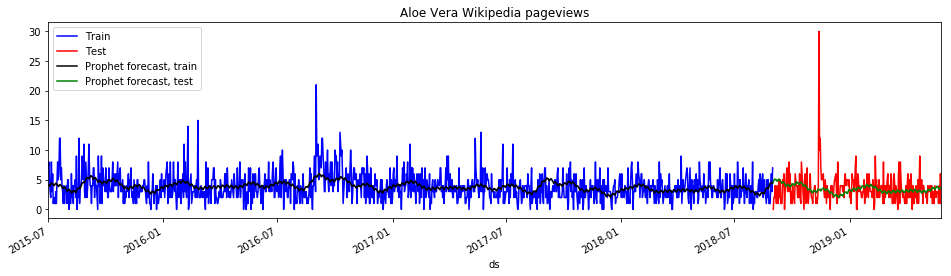

In [81]:
# Error

ax = train.plot(x='ds', y='y', color='blue', label='Train', figsize=(16,4))
test.plot(x='ds', y='y', color='red', label='Test', ax=ax)
train_forecast.plot(x='ds', y='yhat', color='black', 
                    label='Prophet forecast, train', ax=ax)
test_forecast.plot(x='ds', y='yhat', color='green', 
                   label='Prophet forecast, test', ax=ax)
plt.title('Aloe Vera Wikipedia pageviews');
  

In [50]:
df.shape

(1420, 1)

In [83]:
help(cross_validation)

Help on function cross_validation in module fbprophet.diagnostics:

cross_validation(model, horizon, period=None, initial=None)
    Cross-Validation for time series.
    
    Computes forecasts from historical cutoff points. Beginning from
    (end - horizon), works backwards making cutoffs with a spacing of period
    until initial is reached.
    
    When period is equal to the time interval of the data, this is the
    technique described in https://robjhyndman.com/hyndsight/tscv/ .
    
    Parameters
    ----------
    model: Prophet class object. Fitted Prophet model
    horizon: string with pd.Timedelta compatible style, e.g., '5 days',
        '3 hours', '10 seconds'.
    period: string with pd.Timedelta compatible style. Simulated forecast will
        be done at every this period. If not provided, 0.5 * horizon is used.
    initial: string with pd.Timedelta compatible style. The first training
        period will begin here. If not provided, 3 * horizon is used.
    
    Ret

In [85]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = train.shape[0], horizon= 365)

INFO:fbprophet:Making 1152 forecasts with cutoffs between 2015-07-01 23:59:59.999999635 and 2018-08-30 23:59:59.999999635


Exception: ignored

In [49]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

NameError: ignored